In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

# Importing the dataset


dataset = pd.read_csv('heart.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 13].values


In [3]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(X[:,11:13])
X[:,11:13]=imputer.transform(X[:,11:13])

In [4]:
#splitting dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, y, test_size = 0.10, random_state = 23)

In [5]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [6]:
#Explorig the dataset
dataset.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        2

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

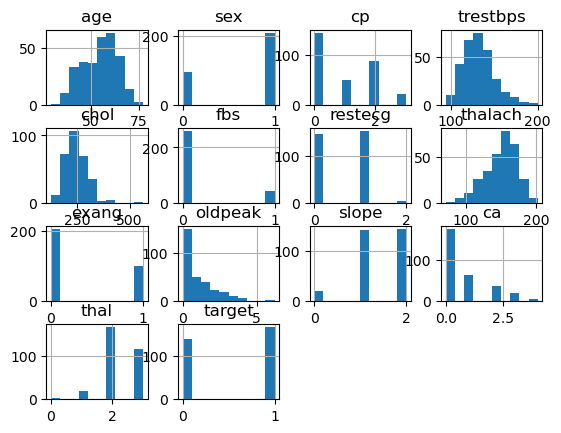

In [7]:
dataset.hist()

In [8]:
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [9]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Logistic Regression

In [12]:
#fitting LR to training set

from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [13]:
#Predict the test set results

y_pred=classifier.predict(X_test)

In [14]:
#checking the accuracy for predicted results

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9032258064516129

In [15]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [16]:
#Interpretation:

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.87      0.93      0.90        14

    accuracy                           0.90        31
   macro avg       0.90      0.91      0.90        31
weighted avg       0.91      0.90      0.90        31



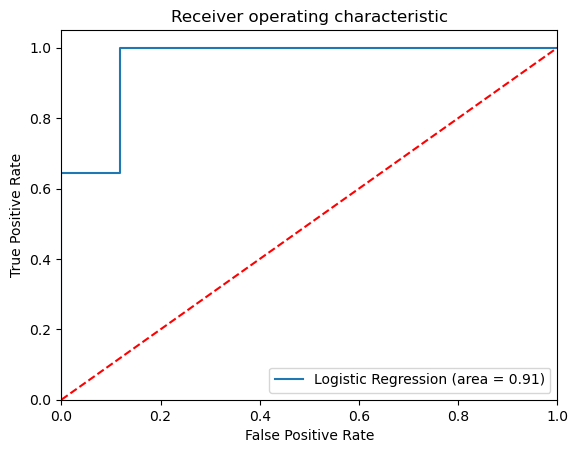

In [17]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [18]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
ynew=classifier.predict(Newdataset)
print("Predicted Class for newdata.csv:",ynew)

Predicted Class for newdata.csv: [0]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# Decision Tree

In [19]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 8)
classifier.fit(X_train, Y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

#ACCURACY SCORE
from sklearn.metrics import accuracy_score
print("ACC",accuracy_score(Y_test,y_pred))

##CONFUSION MATRIX
from sklearn.metrics import classification_report, confusion_matrix  
cm=confusion_matrix(Y_test, y_pred) 

#Interpretation:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))


ACC 0.8709677419354839
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.86      0.86      0.86        14

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



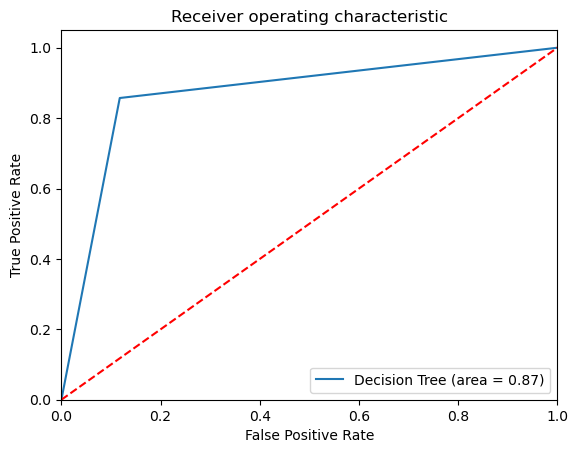

In [20]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [21]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
ynew=classifier.predict(Newdataset)
print("Predicted Class for newdata.csv:",ynew)

Predicted Class for newdata.csv: [0]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


# Naive Bayes

In [22]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)

#ACCURACY SCORE
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)


#Interpretation:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.82      1.00      0.90        14

    accuracy                           0.90        31
   macro avg       0.91      0.91      0.90        31
weighted avg       0.92      0.90      0.90        31



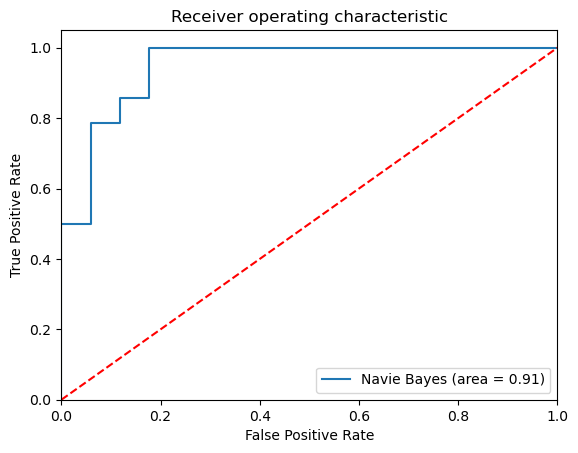

In [23]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Navie Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [24]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
ynew=classifier.predict(Newdataset)
print("Predicted Class for newdata.csv:",ynew)

Predicted Class for newdata.csv: [1]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


# KNN

In [25]:
# Fitting Naive Bayes to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

#ACCURACY SCORE
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)


#Interpretation:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.86      0.86      0.86        14

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



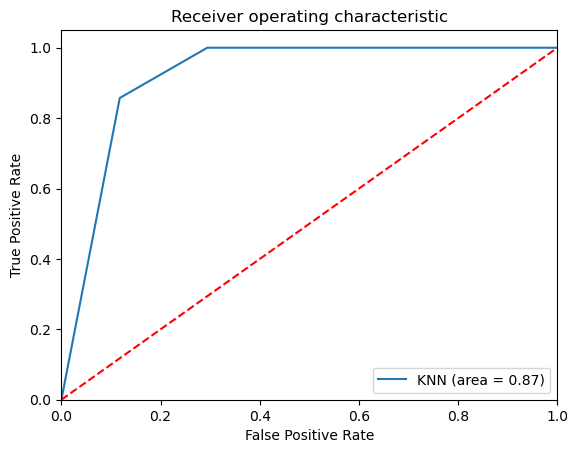

In [26]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [27]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
ynew=classifier.predict(Newdataset)
print("Predicted Class for newdata.csv:",ynew)

Predicted Class for newdata.csv: [1]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


# Random Forest

In [28]:
# Fitting Naive Bayes to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=20)
classifier.fit(X_train, Y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

#Interpretation:

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.76      0.93      0.84        14

    accuracy                           0.84        31
   macro avg       0.85      0.85      0.84        31
weighted avg       0.85      0.84      0.84        31



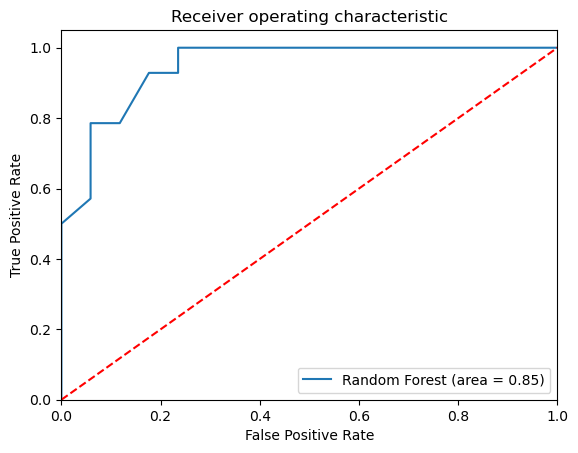

In [29]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [30]:
##PREDICTION FOR NEW DATASET

Newdataset = pd.read_csv('newdata.csv')
ynew=classifier.predict(Newdataset)
print("Predicted Class for newdata.csv:",ynew)

Predicted Class for newdata.csv: [0]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Support Vector Machine

In [31]:
##SUPPORT VECTOR CLASSIFICATIONS

##checking for different kernels

from sklearn.svm import SVC


classifier = SVC(kernel = 'linear', random_state = 0 ,probability=True)
classifier.fit(X_train, Y_train)


# Predicting the Test set results

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

#Interpretation:

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.88      1.00      0.93        14

    accuracy                           0.94        31
   macro avg       0.94      0.94      0.94        31
weighted avg       0.94      0.94      0.94        31



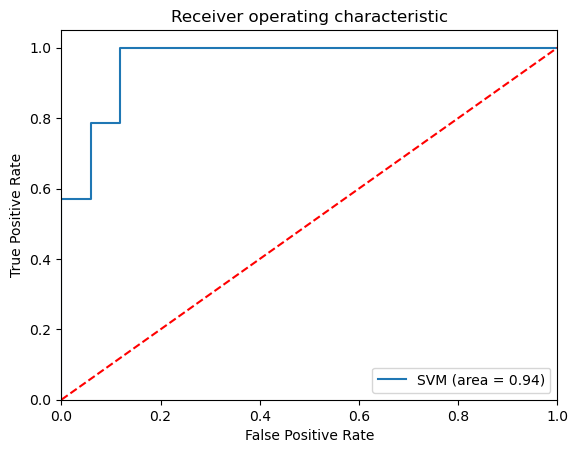

In [32]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()